In [1]:
from word_association import WordTable
import random
import json

In [2]:
class Game():

    topics = ['food', 'animals', 'sports', 'jobs', 'weapons', 'nations']

    def __init__(self, topic='food', players=3, word_size=5):

        def get_list(topic):
            f = open(f'word_dictionary/{topic}_definitions.json', 'r')
            topic_dict = json.load(f)
            return [sug for sug in topic_dict]

        self.topic = topic
        topic_list = get_list(self.topic)
        random.shuffle(topic_list)
        self.suggestions = topic_list[:word_size**2]

    

In [3]:
game = Game(topic= "animals")
print(game.suggestions)
wordtable = WordTable(category=game.topic, wordlist=game.suggestions)

['armadillo', 'owl', 'sea horse', 'jaguar', 'anaconda', 'peccary', 'pigeon', 'mongoose', 'crow', 'panda', 'elk', 'emperor penguin', 'junco', 'hound', 'puffer', 'arctic fox', 'quail', 'gila monster', 'sand lance', 'minnow', 'ferret', 'meerkat', 'manatee', 'hummingbird', 'frog']


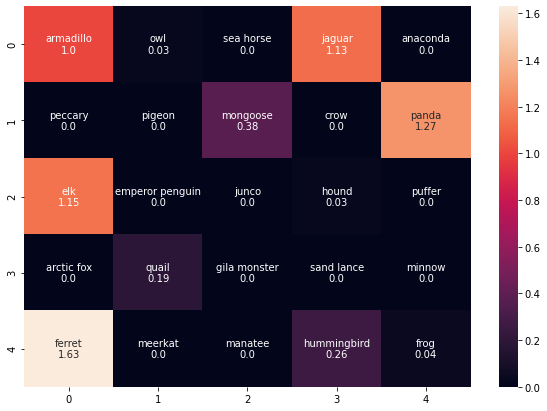

In [4]:
wordtable.resetScore()
wordtable.sentenceScore("It is a small animal.")
wordtable.sentenceScore("It is furry and cute.")
wordtable.sentenceScore("It is a pet.")
wordtable.plot()